In [1]:
import oommfc as oc
import discretisedfield as df

In [2]:
Ms = 8e5
A = 1.3e-11
alpha = 0.1
gamma = 2.211e5

In [3]:
p1 = (0, 0, 0)
p2 = (100e-9, 100e-9, 10e-9)
cell = (2.5e-9, 2.5e-9, 2.5e-9)

mesh = oc.Mesh(p1, p2, cell)

In [4]:
system = oc.System(name="standard_problem5")

In [5]:
system.mesh = mesh

In [6]:
system.hamiltonian = oc.Exchange(A) + oc.Demag()

In [7]:
def m_vortex(pos):
    x, y, z = pos[0]/1e-9-50, pos[1]/1e-9-50, pos[2]/1e-9
    
    return (-y, x, 10)

system.m = df.Field(mesh, value=m_vortex, normalisedto=Ms)

In [8]:
system.dynamics = oc.Precession(gamma) + oc.Damping(alpha)

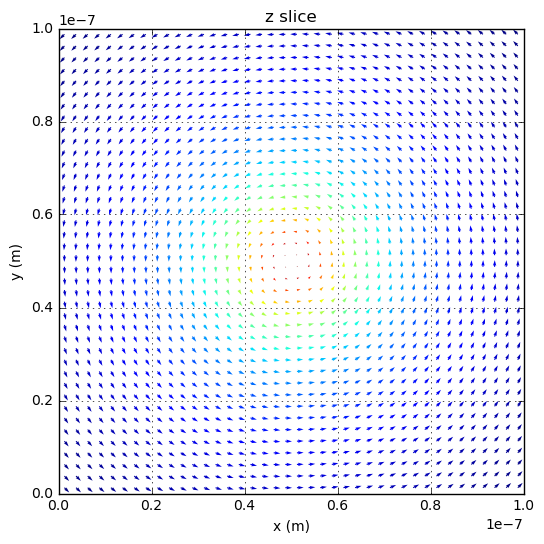

In [9]:
%matplotlib inline
fig = system.m.plot_slice("z", 0, xsize=6)

In [10]:
md = oc.MinDriver()
md.drive(system)

/usr/local/lib/python3.4/dist-packages/discretisedfield/field.py:94: RuntimeWarning: invalid value encountered in true_divide
  self.f[:, :, :, i] = self.normalisedto*self.f[:, :, :, i]/norm


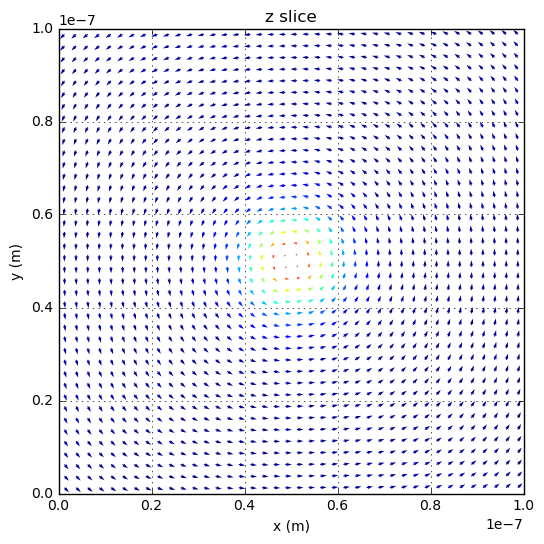

In [11]:
fig = system.m.plot_slice("z", 0, xsize=6)

In [12]:
system.dynamics += oc.STT(u=(-72.35, 0, 0), beta=0.05)

In [13]:
system.dynamics

Precession(gamma=221100.0) + Damping(alpha=0.1) + STT(u=(-72.35, 0, 0), beta=0.05)

In [14]:
td = oc.TimeDriver()
td.drive(system, t=8e-9, n=100)

/usr/local/lib/python3.4/dist-packages/discretisedfield/field.py:94: RuntimeWarning: invalid value encountered in true_divide
  self.f[:, :, :, i] = self.normalisedto*self.f[:, :, :, i]/norm


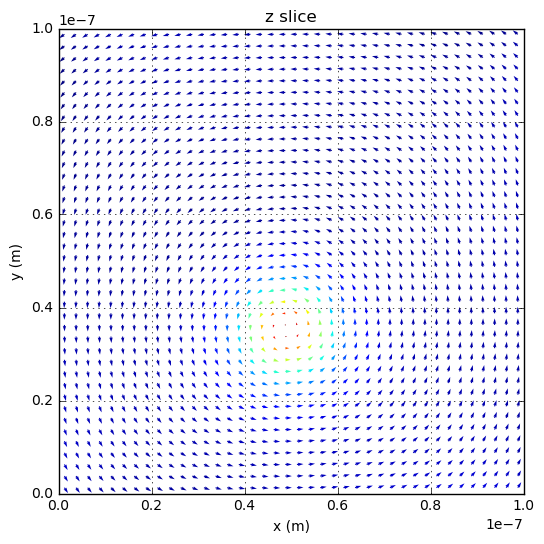

In [15]:
fig = system.m.plot_slice("z", 0, xsize=6)

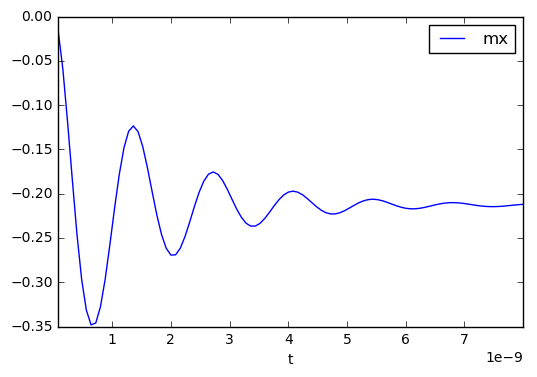

In [16]:
myplot = system.dt.plot("t", "mx")